In [19]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(1)

In [37]:
max_len = 5

def generate_segment(start_x: int, end_x: int, start_y: int = 0, end_y: int = 50):
    first_x, first_y = random.randint(start_x, end_x), random.randint(start_y, end_y)
    end_x = first_x + max_len * random.random()
    end_y = first_y + (max_len**2 - (end_x - first_x)**2)**(0.5) * random.choice((-1, 1))
    return first_x, first_y, end_x, end_y


def generate_segments(num_segments: int, num_ranges: int,
                      start_x: int = 0, start_y: int = 0,
                      end_x: int = 100, end_y: int = 50):
    x_ratio = end_x - start_x
    segments = []

    range_len = x_ratio // num_ranges

    borders_non_overlapping = [start_x + ind * range_len for ind in range(num_ranges)] + [end_x]
    borders_overlapping = [start_x + range_len // 2 + ind * range_len for ind in range(num_ranges)]
    for ind in range(num_ranges):
        segments.extend([generate_segment(borders_non_overlapping[ind], borders_non_overlapping[ind + 1]) for seg in range(num_segments)])


    for ind in range(num_ranges - 1):
        segments.extend([generate_segment(borders_overlapping[ind], borders_overlapping[ind + 1]) for seg in range(num_segments)])

    return segments

In [9]:
def visualize_segments(segments: list):
    fig = plt.figure(figsize=(20, 10))
    for segment in segments:
        plt.plot((segment[0], segment[2]), (segment[1], segment[3]), linestyle="-")

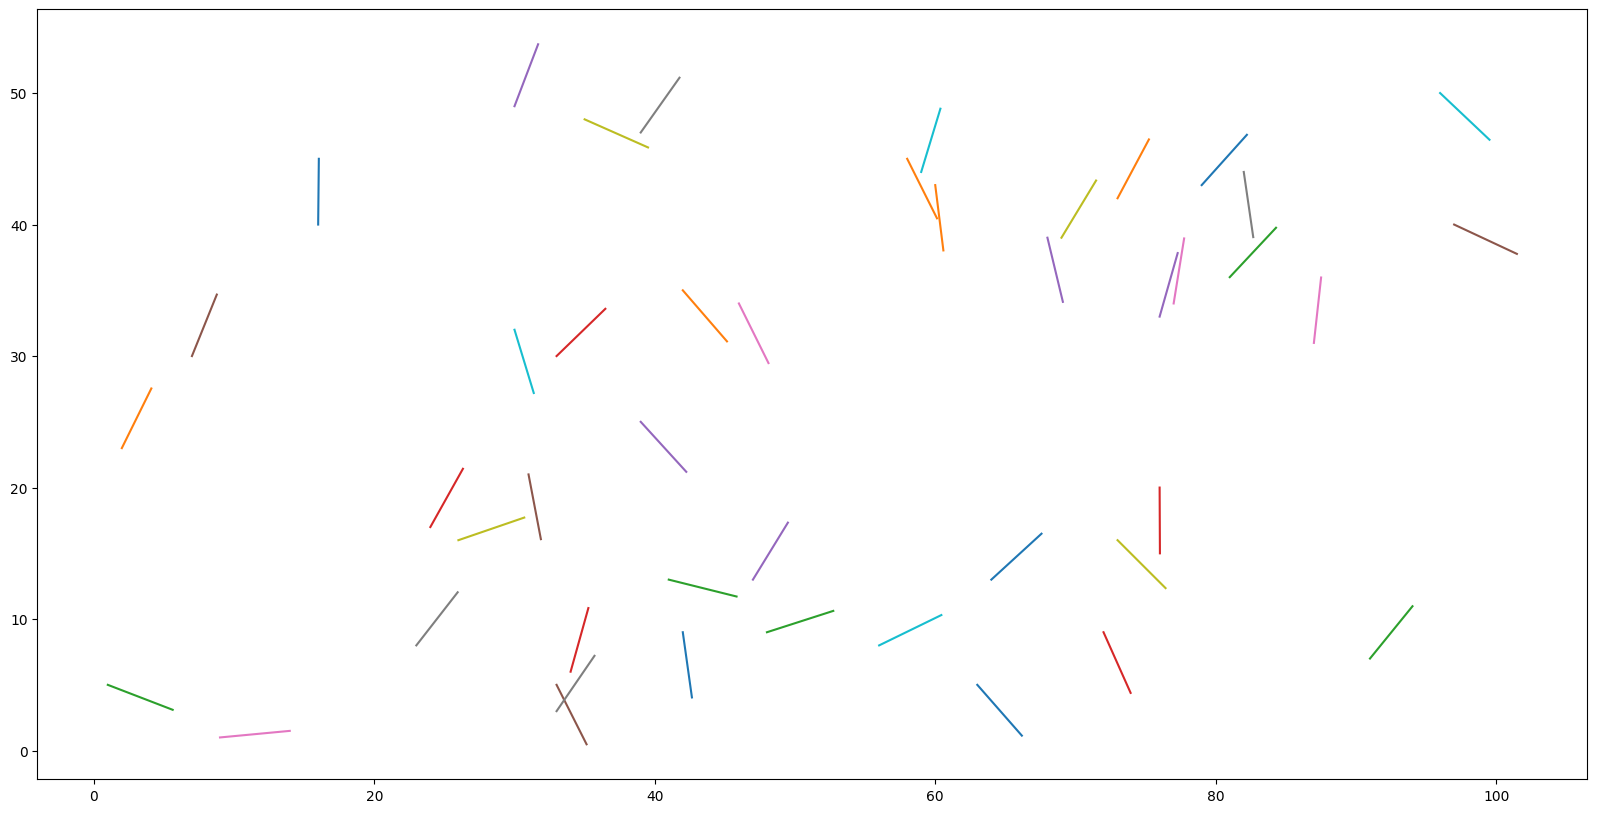

In [40]:
segments = generate_segments(9, 3)
visualize_segments(segments)

In [41]:
def to_cpp_code(segments):
    code_str = 'std::vector<Segment> segments = {'
    offset_len = len(code_str)
    is_first = True
    for segment in segments:
        segment_str = (' ' * offset_len if not is_first else '') + f'Segment(Point({segment[0]}, {segment[1]}), Point({segment[2]}, {segment[3]})),\n'
        code_str += segment_str
        is_first = False
    code_str = code_str[:-2] + '};'
    return code_str

In [42]:
print(to_cpp_code(segments))

std::vector<Segment> segments = {Segment(Point(16, 40), Point(16.048029087280145, 44.99976931535596)),
                                 Segment(Point(2, 23), Point(4.104340322395372, 27.535609309402755)),
                                 Segment(Point(1, 5), Point(5.625818248466825, 3.102157664042843)),
                                 Segment(Point(24, 17), Point(26.321823212204784, 21.42822051971975)),
                                 Segment(Point(30, 49), Point(31.682706526981995, 53.70834352443109)),
                                 Segment(Point(7, 30), Point(8.772483778919847, 34.675286221555425)),
                                 Segment(Point(9, 1), Point(13.975023238810671, 1.499143038911474)),
                                 Segment(Point(23, 8), Point(25.947885684153327, 12.038560386222283)),
                                 Segment(Point(26, 16), Point(30.6952722413014, 17.71884222081741)),
                                 Segment(Point(59, 44), Point(60.368375473972506, 